# Mesh Basics

In [1]:
from __future__ import print_function
import numpy as np
import mesh.patch as patch
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
g = patch.Grid2d(8, 8, ng=2)
d = patch.CellCenterData2d(g)
bc = patch.BCObject(xlb="periodic", xrb="periodic", ylb="reflect", yrb="outflow")
d.register_var("a", bc)
d.create()

In [3]:
print(d)

cc data: nx = 8, ny = 8, ng = 2
   nvars = 1
   variables: 
               a: min:    0.0000000000    max:    0.0000000000
                  BCs: -x: periodic     +x: periodic     -y: reflect-even +y: outflow     



In [4]:
a = d.get_var("a")
a.v()[:,:] = np.random.rand(g.nx, g.ny)

In [5]:
a.pretty_print()

         0         0         0         0         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0         0         0         0         0 
         0         0  0.091376   0.70941   0.44571   0.31914   0.93785   0.74901    0.1429   0.66738         0         0 
         0         0  0.045868   0.84991   0.23648   0.89979   0.11224   0.22282    0.9533   0.12408         0         0 
         0         0   0.97701   0.16599    0.0192   0.11129   0.19169   0.74099   0.30537   0.58485         0         0 
         0         0   0.54325   0.04551    0.4522  0.089519   0.54798   0.06063   0.31396  0.031282         0         0 
         0         0   0.50019  0.069707  0.021167    0.7191   0.40598   0.93297   0.61382    0.3986         0         0 
         0         0   0.30715   0.52326   0.34092   0.18343   0.44011    0.7766   0.59551   0.14095         0         0 
         0         0   0

In [6]:
d.fill_BC("a")
a.pretty_print()

    0.1429   0.66738  0.091376   0.70941   0.44571   0.31914   0.93785   0.74901    0.1429   0.66738  0.091376   0.70941 
    0.1429   0.66738  0.091376   0.70941   0.44571   0.31914   0.93785   0.74901    0.1429   0.66738  0.091376   0.70941 
    0.1429   0.66738  0.091376   0.70941   0.44571   0.31914   0.93785   0.74901    0.1429   0.66738  0.091376   0.70941 
    0.9533   0.12408  0.045868   0.84991   0.23648   0.89979   0.11224   0.22282    0.9533   0.12408  0.045868   0.84991 
   0.30537   0.58485   0.97701   0.16599    0.0192   0.11129   0.19169   0.74099   0.30537   0.58485   0.97701   0.16599 
   0.31396  0.031282   0.54325   0.04551    0.4522  0.089519   0.54798   0.06063   0.31396  0.031282   0.54325   0.04551 
   0.61382    0.3986   0.50019  0.069707  0.021167    0.7191   0.40598   0.93297   0.61382    0.3986   0.50019  0.069707 
   0.59551   0.14095   0.30715   0.52326   0.34092   0.18343   0.44011    0.7766   0.59551   0.14095   0.30715   0.52326 
   0.28806   0.31503   0

In [7]:
a.norm()

0.53605614981786143

In [8]:
print(a.min(), a.max())

0.0191997677101 0.977005775201


## differencing

In [9]:
g = patch.Grid2d(8, 8, ng=2)
d = patch.CellCenterData2d(g)
bc = patch.BCObject(xlb="periodic", xrb="periodic", ylb="periodic", yrb="periodic")
d.register_var("a", bc)
d.create()

a = d.get_var("a")
a.d[:,:] = np.sin(2.0*np.pi*a.g.x2d)
d.fill_BC("a")

In [10]:
b = g.scratch_array()
b.v()[:,:] = (a.ip(1) - a.ip(-1))/(2.0*a.g.dx)
# normalization was 2.0*pi
b.d[:,:] /= 2.0*np.pi

0.125


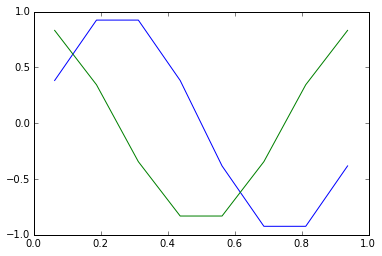

In [11]:
plot(g.x[g.ilo:g.ihi+1], a.d[g.ilo:g.ihi+1,a.g.jc])
plot(g.x[g.ilo:g.ihi+1], b.d[g.ilo:g.ihi+1,b.g.jc])
print (a.g.dx)

## coarsening and prolonging

In [12]:
c = d.restrict("a")

In [13]:
c.pretty_print()

         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 
         0         0   0.65328   0.65328  -0.65328  -0.65328         0         0 
         0         0   0.65328   0.65328  -0.65328  -0.65328         0         0 
         0         0   0.65328   0.65328  -0.65328  -0.65328         0         0 
         0         0   0.65328   0.65328  -0.65328  -0.65328         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 

         ^ y
         |
         +---> x
        


In [14]:
f = d.prolong("a")

In [15]:
f.pretty_print()

         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0 
         0         0   0.21936     0.546   0.85623   0.99153   0.99153   0.85623     0.546   0.21936  -0.21936    -0.546  -0.85623  -0.99153  -0.99153  -0.85623    -0.546  -0.21936         0         0 
         0         0   0.21936     0.546   0.85623   0.99153   0.99153   0.85623     0.546   0.21936  -0.21936    -0.546  -0.85623  -0.99153  -0.99153  -0.85623    -0.546  -0.21936         0         0 
         0         0   0.21936     0.546   0.85623   0.99153   0.99153   0.85623     0.546   0.21936  -0.21936    -0.546  -0.85623  -0.99153  -0.99153  -0.85623    -0.546  -0.21936         0  